# Estudo de Insights de Best Sellers 

Os dados utilizados foram disponibilizados no Kaggle por Diógenes Silva. O propósito é estudar e demonstrar formas de utilizar os dados para gerar insights para uma editora especializada em Best Sellers. Os dados foram retirados de sites de três sites de venda, Amazon, Barnes & Noble, eBay. Os dados foram disponibilizados em duas formas, limpos e não limpos, irei utilizar os não limpos. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
amazon = pd.read_csv('../input/bestsellers-books-amazon-ebay-and-barnesnoble/amazon_products.csv')
barnes_nobles = pd.read_csv('../input/bestsellers-books-amazon-ebay-and-barnesnoble/barnes_noble_products.csv')
ebay = pd.read_csv('../input/bestsellers-books-amazon-ebay-and-barnesnoble/ebay_products.csv')

In [3]:
amazon.head(5)

,Book Name,Author,Price,Customers_Rated,Rating,Book_cover
0,Finding Me: A Memoir,Viola Davis,$18.84,314,4.8 out of 5 stars 314,Hardcover
1,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,$11.98,"79,977","4.8 out of 5 stars 79,977",Hardcover
2,"This Will Not Pass: Trump, Biden, and the Batt...",Jonathan Martin,$24.99,4,4.2 out of 5 stars 4,Hardcover
3,Bill O'Reilly,NaN,NaN,NaN,NaN,NaN
4,Just Tyrus: A Memoir,Tyrus,$32.49,898,4.7 out of 5 stars 898,Hardcover


In [4]:
barnes_nobles.head(5)

,Book Name,Year,Author,Price,Book_cover
0,"Heartstopper, Volume 2",2020,Alice Oseman,12.99,Paperback
1,"Heartstopper, Volume 1",2020,Alice Oseman,12.99,Paperback
2,The Mothers and Daughters of the Bible Speak: ...,2022,Shannon Bream,19.99,Hardcover
3,Book Lovers,2022,Emily Henry,14.99,Paperback
4,Knight Owl,2022,Christopher Denise,14.99,Hardcover


In [5]:
ebay.head(5)

,Book Name,Author,Year,Book_cover,price_new,price_used,Rating,Customers_Rated
0,The Lost Book of Herbal Remedies,Claude Davis,2018,Paperback,37.00,35.00,4.8,359.0
1,Just Tyrus : A Memoir,Tyrus,2022,Hardcover,22.00,---,No,NaN
2,Heartstopper Ser.: Heartstopper (Heartstopper #1),Alice Oseman,2020,Trade Paperback,21.95,10.36,5.0,1.0
3,River of Time : My Descent into Depression and...,Naomi Judd,2017,Trade Paperback,22.95,16.93,No,NaN
4,Bill o'Reilly's Killing Ser.: Killing the Kill...,Martin Dugard and Bill O'Reilly,2022,Hardcover,19.99,---,No,NaN


In [6]:
print(amazon.shape, barnes_nobles.shape, ebay.shape)

(62, 6) (80, 5) (100, 8)


In [7]:
a = amazon.shape[0]
amazon.dropna(inplace=True)
b = amazon.shape[0]
a-b

7

In [8]:
a = barnes_nobles.shape[0]
barnes_nobles.dropna(inplace=True)
b = barnes_nobles.shape[0]
a-b

0

In [9]:
a = ebay.shape[0]
ebay.dropna(inplace=True)
b = ebay.shape[0]
a-b

43

### Tratando livros da Amazon

In [10]:
print(amazon.shape, barnes_nobles.shape, ebay.shape)

(55, 6) (80, 5) (57, 8)


In [11]:
amazon['Rating'].drop_duplicates()

0         4.8 out of 5 stars 314
1      4.8 out of 5 stars 79,977
2           4.2 out of 5 stars 4
4         4.7 out of 5 stars 898
5          4.6 out of 5 stars 21
6         4.9 out of 5 stars 786
7       4.9 out of 5 stars 2,620
8     4.8 out of 5 stars 221,019
9      4.9 out of 5 stars 36,141
11     4.7 out of 5 stars 88,865
12     4.6 out of 5 stars 85,090
13     4.6 out of 5 stars 71,973
14          5.0 out of 5 stars 5
16          4.5 out of 5 stars 2
17        4.8 out of 5 stars 857
18     4.8 out of 5 stars 46,647
19        4.7 out of 5 stars 578
20         4.6 out of 5 stars 71
21        4.8 out of 5 stars 162
22      4.8 out of 5 stars 9,575
23     4.9 out of 5 stars 48,681
24     4.7 out of 5 stars 71,963
25        4.2 out of 5 stars 254
26         4.7 out of 5 stars 64
27     4.7 out of 5 stars 41,036
28     4.7 out of 5 stars 40,223
29     4.7 out of 5 stars 77,926
31     4.8 out of 5 stars 71,348
32         4.6 out of 5 stars 36
33     4.8 out of 5 stars 10,297
34    4.3 

In [12]:
amazon['Rating'] = amazon['Rating'].str.slice(stop=3)

In [13]:
amazon['Rating'].value_counts()

4.8    16
4.7    13
4.9    10
4.6     7
4.2     3
5.0     2
4.3     2
4.5     1
4.4     1
Name: Rating, dtype: int64

In [14]:
amazon['Price'].drop_duplicates()

0     $18.84
1     $11.98
2     $24.99
4     $32.49
5     $13.60
6     $17.05
7     $14.18
8      $9.98
9      $8.98
11    $11.17
12    $11.26
13     $9.42
14     $9.99
16    $18.29
17    $19.48
18    $11.40
19     $9.95
20    $19.43
21    $13.38
22    $18.34
23     $5.06
24    $12.22
25    $22.46
26    $18.60
27    $11.90
28    $10.40
29     $7.74
31     $4.53
32    $16.38
33    $14.95
34    $13.29
35    $34.68
36    $12.54
37     $4.98
38    $19.59
39     $5.99
40    $10.78
41    $13.50
42     $8.89
43    $10.83
44    $20.59
45     $5.36
47    $18.27
48    $12.70
49    $16.95
50    $13.76
51    $17.99
52    $16.88
53     $7.19
54     $9.59
57     $6.89
58    $29.99
59    $16.59
60    $18.00
Name: Price, dtype: object

In [15]:
amazon['Price'] = amazon['Price'].str.slice(start=1)

In [16]:
amazon['Price'].value_counts()

9.95     2
18.84    1
20.59    1
13.29    1
34.68    1
12.54    1
4.98     1
19.59    1
5.99     1
10.78    1
13.50    1
8.89     1
10.83    1
5.36     1
16.38    1
18.27    1
12.70    1
16.95    1
13.76    1
17.99    1
16.88    1
7.19     1
9.59     1
6.89     1
29.99    1
16.59    1
14.95    1
4.53     1
11.98    1
7.74     1
24.99    1
32.49    1
13.60    1
17.05    1
14.18    1
9.98     1
8.98     1
11.17    1
11.26    1
9.42     1
9.99     1
18.29    1
19.48    1
11.40    1
19.43    1
13.38    1
18.34    1
5.06     1
12.22    1
22.46    1
18.60    1
11.90    1
10.40    1
18.00    1
Name: Price, dtype: int64

In [17]:
amazon['Price'] = amazon['Price'].astype(float)
amazon['Rating'] = amazon['Rating'].astype(float)
print(type(amazon['Price']), type(['Rating']))

<class 'pandas.core.series.Series'> <class 'list'>


In [18]:
sns.set_palette('Set3')
sns.set_style('ticks')

In [19]:
amazon = amazon.sort_values(by='Rating', ascending=True)

In [20]:
amazon['Author'].value_counts()

Colleen Hoover              4
Shannon Bream               2
Questions About Me          2
Tieghan Gerard              2
Daphne Oz                   1
Tui T. Sutherland           1
Viola Davis                 1
Crystal Radke               1
Joanna Gaines               1
Brené Brown                 1
JJ Smith                    1
Bessel van der Kolk M.D.    1
James Clear                 1
Kentaro Miura               1
Delia Owens                 1
Gregory E. Lang             1
Kobi Yamada                 1
Robert Munsch               1
Matt Walsh                  1
Dr. Seuss                   1
Margaret Wise Brown         1
Eric Carle                  1
J. K. Rowling               1
Pablo Neruda                1
Shelby Van Pelt             1
Jimmy Fallon                1
Heidi Murkoff               1
James Patterson             1
Jonathan Martin             1
Laura Dave                  1
Matt Haig                   1
Amor Towles                 1
Steven Rinella              1
Mark Manso

In [21]:
amazon_autores_avaliacao = pd.DataFrame(amazon['Rating'].value_counts())
amazon_autores_avaliacao.reset_index(inplace=True)
amazon_autores_avaliacao.rename(columns={'index': 'Avaliação','Rating':'Número de autores'}, inplace=True)
amazon_autores_avaliacao

,Avaliação,Número de autores
0,4.8,16
1,4.7,13
2,4.9,10
3,4.6,7
4,4.2,3
5,4.3,2
6,5.0,2
7,4.4,1
8,4.5,1


<AxesSubplot:title={'center':'Preço(dolar) por Avaliação'}, xlabel='Avaliação', ylabel='Preço(dolar)'>

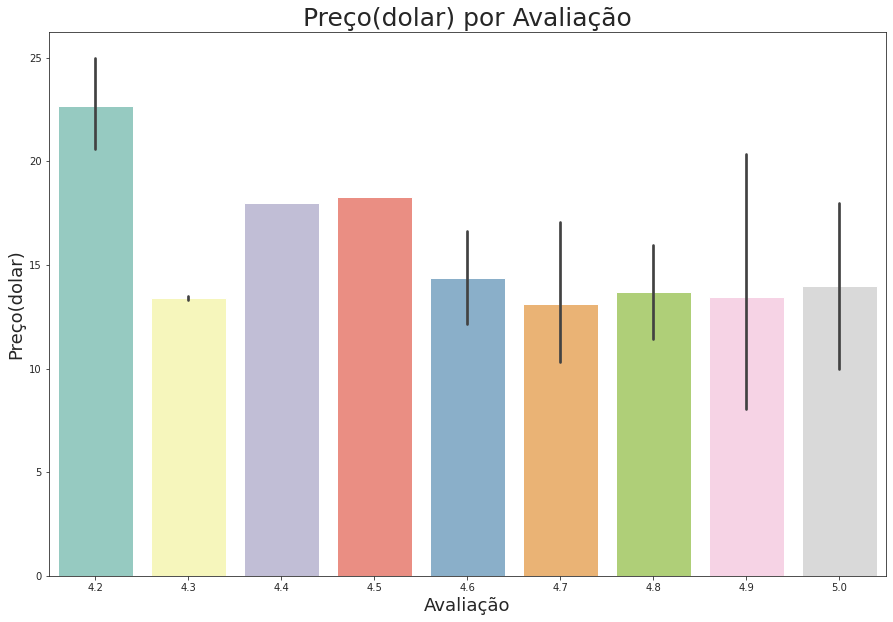

In [22]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=amazon, x='Rating', y='Price', )
ax.set_title('Preço(dolar) por Avaliação', fontsize=25)
ax.set_xlabel('Avaliação', fontsize=18)
ax.set_ylabel('Preço(dolar)', fontsize=18)
ax

<AxesSubplot:title={'center':'Número de autores por avaliação'}, xlabel='Avaliação', ylabel='Número de autores'>

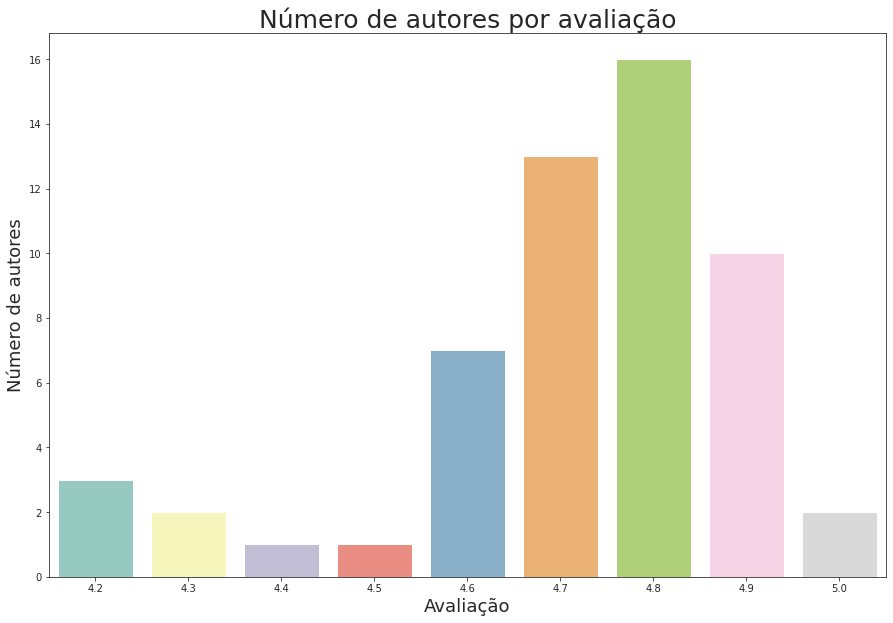

In [23]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=amazon_autores_avaliacao, x='Avaliação', y='Número de autores', )
ax.set_title('Número de autores por avaliação', fontsize=25)
ax.set_xlabel('Avaliação', fontsize=18)
ax.set_ylabel('Número de autores', fontsize=18)
ax

<AxesSubplot:title={'center':'Dstribuição de frequencia do preço'}, xlabel='Preço', ylabel='Frequência'>

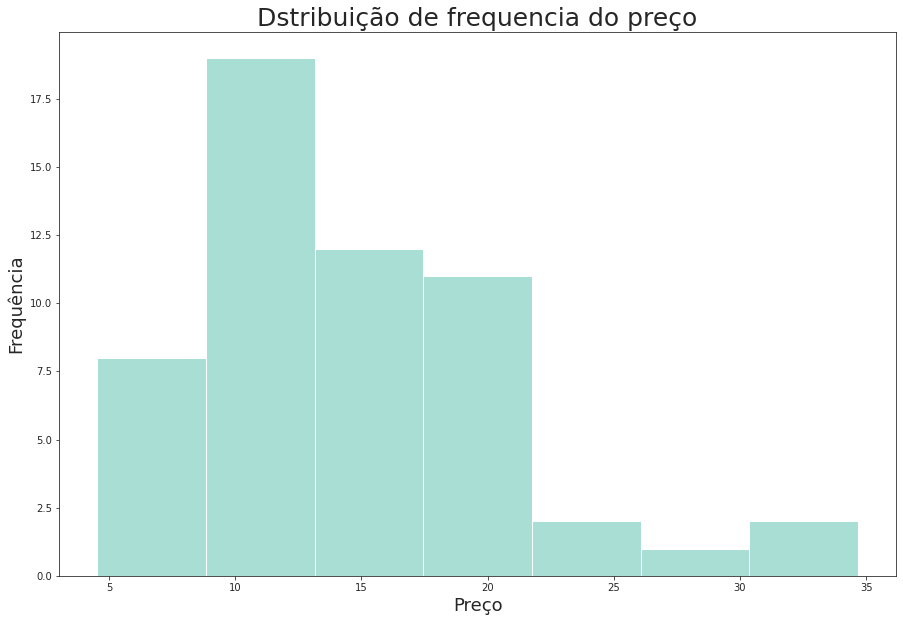

In [24]:
plt.figure(figsize=(15,10))
ax = sns.histplot(amazon['Price'], bins=7)
ax.set_title('Dstribuição de frequencia do preço', fontsize=25)
ax.set_xlabel('Preço', fontsize=18)
ax.set_ylabel('Frequência', fontsize=18)
ax

### Breves conclusões:
* Livros mais bem avaliados parecem ser mais baratos que os piores avaliados;
* Ainda assim, existe uma tendência de melhores avaliações, havendo mais autores com avaliações entre 4.6 e 4.9.
* Existem mais livros com preços entre 10 e 20 dolares. Esses são melhores avaliados, possivelmente a tendência média é de boas avaliações de best sellers. 